# INSTRUMENTAL A

Em aula de Analise Instrumental A, diciplina da UFMG, iniciamos analisando as buretas utilizadas nos experiemntos de forma que façamos as correções volumétricas, pois as buretas possuem erro entre o quanto foi observado e o quanto de fato foi utilizado. 

A próxima célula apresenta os volumes medidos em uma bureta de $10~mL$ e a massa pesada de água, relacionamos a densidade, pressão atmosferica e temperatura para podermos fazer a equação de correção da bureta 14.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math

## Curva volumétrica bureta 14

[[ 470.00987597  471.71109812  474.64098072]
 [ 938.03499275  932.83681395  929.24534496]
 [1874.36876335 1869.45412158 1861.04252315]
 [3745.99666879 3749.21008842 3752.99058209]
 [5640.96912267 5626.69775905 5628.96605526]
 [7518.17325628 7509.10007146 7522.520824  ]
 [9416.73717914 9398.02373546 9408.70363009]]
Média por linha: [ 472.1206516   933.37238389 1868.28846936 3749.3991131  5632.21097899
 7516.59805058 9407.8215149 ]
R² = 0.9999966


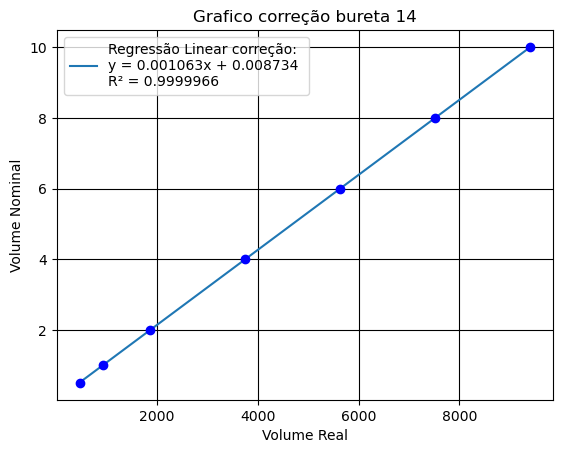

In [26]:
dh= 0.996089
da=0.001061
ta=30
t=28.5
pa=923
g=10**(-5)

def v_m (m):
    v=m*(1/(dh*da))*(1-da)*(1-g*(t-20))
    return v

y=np.array([[0.4973,0.4991,0.5022],
            [0.9925,0.9870,0.9832],
            [1.9832,1.9780,1.9691],
            [3.9635,3.9669,3.9709],
            [5.9685,5.9534,5.9558],
            [7.9547,7.9451,7.9593],
            [9.9635,9.9437,9.9550]])
v=v_m(y)
print (v)

media_volume = np.mean(v, axis=1)
print("Média por linha:", media_volume)

vn=np.array([0.5,1,2,4,6,8,10])

# Regressão linear
coefficients = np.polyfit(media_volume,vn, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
vn_fit = poly(media_volume)  # Valores ajustados
ss_res = np.sum((vn - vn_fit) ** 2)  # Soma dos quadrados dos resíduos
ss_tot = np.sum((vn - np.mean(vn)) ** 2)  # Soma dos quadrados totais
r_squared = 1 - (ss_res / ss_tot)
# Exibe o valor de R²
print(f"R² = {r_squared:.7f}")
plt.plot(media_volume, vn_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.6f}x + {coefficients[1]:.6f} \nR² = {r_squared:.7f}')


plt.plot(media_volume,vn,'ob')
plt.xlabel('Volume Real')
plt.ylabel('Volume Nominal')
plt.title('Grafico correção bureta 14')


plt.legend()
plt.grid(True,color='k')
plt.show
plt.savefig('grafico_bureta14.png', format='png')


## Titulação Potenciometrica - pHmetro


O próximo experimento realizado no laboratório foi titulação potenciometrica de Ácido Poliprótico, utilizamos indicadores indicados para faixa de pH de interesse e associamos a medido do pH-metro com o ponto de viragem pecebidos.

Para encontrar o ponto de viragem devemos fazer a devidada segunda do volume e o pH refente a derivada é a diferença entre $n$ e $n+1$ não é necessário calcular a diferença dessa maneira diretamente. 
Você pode usar $v_{NaOH_{[i]}} - v_{NaOH_{[i-1]}}$ para calcular a diferença entre o termo na posição $i$ e o anterior.

De acordo com recomentdação do México temos:

Primeira derivada:
$$x=V_{med_1} = \frac{(V_{1}+V_{2})}{2}$$
$$y=\frac{\delta pH}{\delta V}$$

[-1.700000e-03  5.026500e-01  1.007000e+00  1.511350e+00  2.015700e+00
  2.267875e+00  2.520050e+00  2.772225e+00  3.024400e+00  3.276575e+00
  3.528750e+00  3.780925e+00  4.033100e+00  4.537450e+00  5.041800e+00
  5.293975e+00  5.546150e+00  5.798325e+00  6.050500e+00  6.302675e+00
  6.554850e+00  6.807025e+00  7.059200e+00  7.563550e+00  8.067900e+00
  8.572250e+00  9.076600e+00  9.580950e+00  1.008530e+01]
[0.250475  0.754825  1.259175  1.763525  2.1417875 2.3939625 2.6461375
 2.8983125 3.1504875 3.4026625 3.6548375 3.9070125 4.285275  4.789625
 5.1678875 5.4200625 5.6722375 5.9244125 6.1765875 6.4287625 6.6809375
 6.9331125 7.311375  7.815725  8.320075  8.824425  9.328775  9.833125 ] [ 0.0991375  -0.0198275   0.17844751  0.43620502  0.99137504  0.79310003
  1.30861505  4.44136017  5.71032021  1.74482007  0.79310003  0.71379003
  0.57499752  0.53534252  0.51551502  0.75344503  0.83275503  1.26896005
  3.68791514  5.63101021  1.70516506  0.87241003  0.51551502  0.31724001
  0.3370675

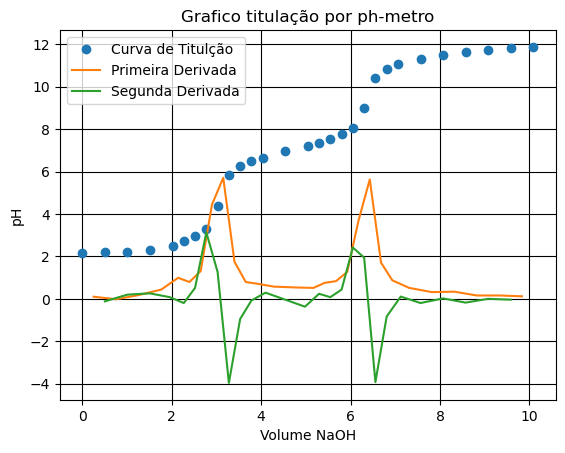

In [34]:
vNaOH=np.array([0,0.5,1,1.5,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.5,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.5,8,8.5,9,9.5,10])
pH=np.array([2.15,2.2,2.19,2.28,2.5,2.75,2.95,3.28,4.4,5.84,6.28,6.48,6.66,6.95,7.22,7.35,7.54,7.75,8.07,9,10.42,10.85,11.07,11.33,11.49,11.66,11.74,11.82,11.88])

#Equacao Bureta 1
#y=ax+b
a=1.0087
b=-0.0017
r2=0.999998

v=a*vNaOH+b
print (v)
#---------------------------------------------
plt.plot(v, pH, 'o', label='Curva de Titulção')
plt.xlabel('Volume NaOH')
plt.ylabel('pH')
plt.title('Grafico titulação por ph-metro')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_potenciomtrica.png', format='png')
#-------------------------------------------------------------------------------
#Primeira derivada:
def derivada(v):
    # Lista para armazenar as derivadas
    derivadas = []
    
    # Loop que começa no segundo elemento (índice 1)
    for i in range(1, len(v)):
        # Calcula a diferença entre o termo atual e o anterior
        dv = v[i] - v[i-1]
        derivadas.append(dv)
    
    return np.array(derivadas)  # Converte para array para melhor manipulação
def volume_medio(v):
    # Lista para armazenar os volumes médios
    volumes = []
    
    for i in range(1, len(v)):
        # Calcula o volume médio entre o termo atual e o anterior
        vm = (v[i] + v[i-1]) / 2
        volumes.append(vm)
    
    return np.array(volumes)  # Retorna como array


derivadas_vNaOH = derivada(v)
derivadas_pH=derivada(pH)
d1=derivadas_pH/derivadas_vNaOH
vmed_NaOH=volume_medio(v)
print (vmed_NaOH,d1)

#-------------------------------------------------------

plt.plot(vmed_NaOH,d1, '-', label='Primeira Derivada')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_1devrivada.png', format='png')

#----------------------------------------------------------------
# Segunda derivada
derivadas2_vNaOH = derivada(vmed_NaOH)
derivadas2_pH=derivada(derivadas_pH)
vmed2_NaOH=volume_medio(vmed_NaOH)
d2=derivadas2_pH/derivadas2_vNaOH

plt.plot(vmed2_NaOH, d2, '-', label='Segunda Derivada')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao2derivada.png', format='png')

Segunda derivada:

$$x=V'_{med_1} = \frac{(V_{med_1}+V_{med_2})}{2}$$
$$y=\frac{\delta ^2pH}{\delta V^2}$$

Com isso vamos ter um reta que intercepta o eixo x, iremos fazer uma reta e calcular qual o ponto de viragem.

Valores de ph: [-0.118965    0.19827501  0.25775751  0.07931    -0.19827501  0.51551502
  3.13274512  1.26896005 -3.96550015 -0.95172004 -0.07931     0.29080334
 -0.039655   -0.37011335  0.23793001  0.07931     0.43620502  2.41895509
  1.94309507 -3.92584515 -0.83275503  0.10574667 -0.19827501  0.0198275
 -0.17844751  0.         -0.039655  ]


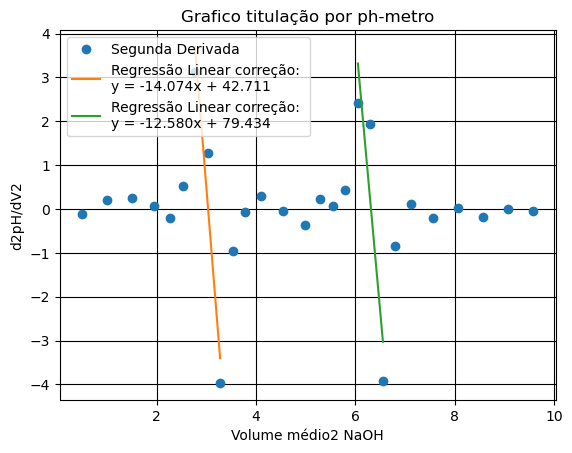

In [38]:
# Segunda derivada
derivadas2_vNaOH = derivada(vmed_NaOH)
derivadas2_pH=derivada(derivadas_pH)
vmed2_NaOH=volume_medio(vmed_NaOH)
d2=derivadas2_pH/derivadas2_vNaOH

plt.plot(vmed2_NaOH, d2, 'o', label='Segunda Derivada')
plt.xlabel('Volume médio2 NaOH')
plt.ylabel('d2pH/dV2')
plt.title('Grafico titulação por ph-metro')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao2derivada.png', format='png')

print ( "Valores de ph:",d2)

pv1=d2[6:9]
pv2=d2[17:20]
pvNaOH1=vmed2_NaOH[6:9]
pvNaOH2=vmed2_NaOH[17:20]

# Regressão linear
coefficients = np.polyfit(pvNaOH1,pv1, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv1_fit = poly(pvNaOH1)  # Valores ajustados
plt.plot(pvNaOH1, pv1_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')

# Regressão linear
coefficients = np.polyfit(pvNaOH2,pv2, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv2_fit = poly(pvNaOH2)  # Valores ajustados
plt.plot(pvNaOH2, pv2_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')
plt.legend()

In [39]:
#Equacao ponto de viragem 1
a1=-14.074046
b1=42.710947

#equacao ponto de viragem 2
a2=-12.580153
b2=79.434018

def calcular_x (a,b,y):
    x=(y-b)/a
    return x
y=0
x1=calcular_x(a1,b1,y)
x2=calcular_x(a2,b2,y)

print (x1,x2)

3.034731235069148 6.314233062189307


## DETERMINAÇÃO POTENCIOMÉTRICA  DO ÁCIDO ACETILSALICÍLICO EM  COMPRIMIDOS

[-1.700000e-03  5.026500e-01  1.007000e+00  1.511350e+00  2.015700e+00
  2.520050e+00  3.024400e+00  3.276575e+00  3.528750e+00  3.780925e+00
  4.033100e+00  4.285275e+00  4.537450e+00  4.789625e+00  5.041800e+00
  5.293975e+00  5.546150e+00  5.798325e+00  6.050500e+00  6.554850e+00
  7.059200e+00  7.563550e+00  8.067900e+00  8.572250e+00  9.076600e+00
  9.580950e+00  1.008530e+01]


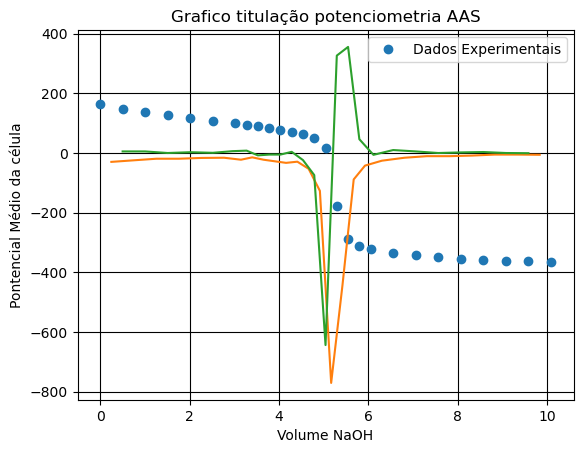

In [43]:
vNaOHe=np.array([0,0.5,1,1.5,2,2.5,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.5,7,7.5,8,8.5,9,9.5,10])
E1=np.array([165,152,139,130,120,112,103,98,93,87,80,72,61,40,0,-274,-305,-319,-328,-338,-345,-348,-356,-360,-363,-366,-368])
E2=np.array([163,150,139,127,116,107,100,95,91,85,77,66,64,56,21,-238,-298,-315,-326,-338,-346,-351,-355,-359,-361,-363,-367])
E3=np.array([162,143,130,122,114,106,98,91,89,84,78,72,63,52,31,-19,-264,-300,-312,-329,-338,-346,-350,-355,-358,-361,-364])

E = np.column_stack((E1, E2, E3))
Em=np.mean(E, axis=1)

#Equacao Bureta 1
#y=ax+b
ve=a*vNaOHe+b
print (ve)
#---------------------------------------------
plt.plot(ve, Em, 'o', label='Dados Experimentais')
plt.xlabel('Volume NaOH')
plt.ylabel('Pontencial Médio da célula')
plt.title('Grafico titulação potenciometria AAS')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_ass.png', format='png')
#----------------------------------------------------------------
#Primeira Derivada
derivadas_vNaOHe = derivada(ve)
derivadas_Em=derivada(Em)
dEm=derivadas_Em/derivadas_vNaOHe
vmed_NaOHe=volume_medio(ve)
plt.plot(vmed_NaOHe,dEm, '-', label='Dados Primeira Derivada')

#-------------------------------------------------------------------
#Segunda Derivada
derivadas2_vNaOHe = derivada(vmed_NaOHe)
vmed2_NaOHe=volume_medio(vmed_NaOHe)

derivadas2_Em=derivada(derivadas_Em)
d2Em=derivadas2_Em/derivadas2_vNaOHe
plt.plot(vmed2_NaOHe,d2Em, '-', label='Dados Experimentais')

O volume utilizado até o ponto de viragem é 5.2875


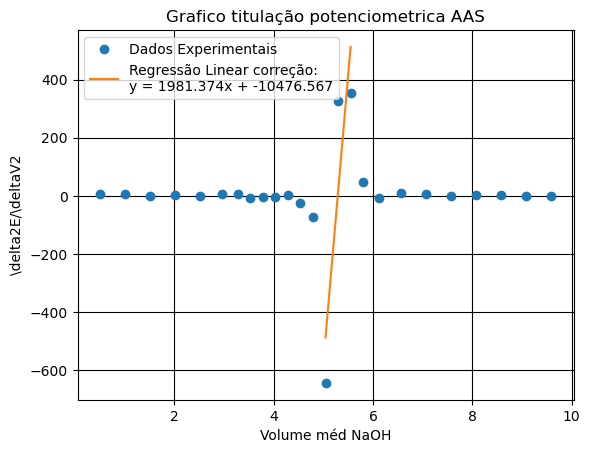

In [44]:
plt.plot(vmed2_NaOHe,d2Em, 'o', label='Dados Experimentais')
plt.xlabel('Volume méd NaOH')
plt.ylabel('\delta2E/\deltaV2')
plt.title('Grafico titulação potenciometrica AAS')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_ass_2deriv.png', format='png')

pv=d2Em[13:16] #intervalo em que forma uma reta e corta o eixo X
pvNaOH=vmed2_NaOHe[13:16]

# Regressão linear
coefficients = np.polyfit(pvNaOH,pv, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv_fit = poly(pvNaOH)  # Valores ajustados
plt.plot(pvNaOH, pv_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')
plt.legend()
#y=b+ax
a=coefficients[0]
b=coefficients[1]

def calcular_x (a,b,y):
    x=(y-b)/a
    return x
y=0
x=calcular_x(a,b,y)
print ('O volume utilizado até o ponto de viragem é {:.4f}'.format (x))

#### CÁLCULO DO PRINCÍPIO ATIVO NO COMPRIMIDO DE AAS

In [48]:
massa=np.array([0.4271,0.4286,0.4283,0.4165,0.4305,0.4173,0.4240,0.4105,0.4195])
mmed=np.mean(massa)
n=9
t=2.31
s=np.std(massa, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic=(t*s)/math.sqrt(n)
print('({:.4} +/- {:.2}) g'.format(mmed,Ic))
p=(s/mmed)*100
print ('A precisão é {:.3}%'.format(p))
Cnaoh=0.43 #mol/L
Vgnaoh=np.array([5.123,5.132,5.371,5.118,5.132,4.856,5.112,4.874,4.623]) #mL
MMaas=180.16 #g/mol

Nnaoh=(Vgnaoh*Cnaoh)/1000
Naas=Nnaoh
maas=Naas*MMaas
print('Possui {} mg de AAS por comprimido'. format(maas))

maasmed=np.mean(maas)
saas=np.std(maas, ddof=1) #Calculo de desvio padrao amostral com numpy
Icaas=(t*saas)/math.sqrt(n)
paas = (saas / maasmed) * 100
print('({:.4} +/- {:.3}) g e a precisão é {:.5}%'.format(maasmed,Icaas,paas))
principio_ativo=(maas/massa)*100

principio_ativo_med=np.mean(principio_ativo)
s_principio_ativo=np.std(principio_ativo, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_principio_ativo=(t*s_principio_ativo)/math.sqrt(n)
p_principio_ativo = (s_principio_ativo / principio_ativo_med) * 100
print('({:.4} +/- {:.3}) g e a precisão é {:.5}%'.format(principio_ativo_med,Ic_principio_ativo,p_principio_ativo))

(0.4225 +/- 0.0053) g
A precisão é 1.62%
Possui [0.39687266 0.39756988 0.41608492 0.39648532 0.39756988 0.37618849
 0.39602051 0.37758293 0.35813826] mg de AAS por comprimido
(0.3903 +/- 0.013) g e a precisão é 4.3256%
(92.36 +/- 2.53) g e a precisão é 3.5576%


## DETERMINAÇÃO DE CAPTOPRIL EM COMPRMIDO POR TITULAÇÃO CONDUTIMÉTRICA

A Titulação condutimétrica depende de $\theta$ e $\lambda$, é realizada a medida da L após cada incremento de titulante sob agitação.

O volume utilizado até o ponto de viragem é 3.6943


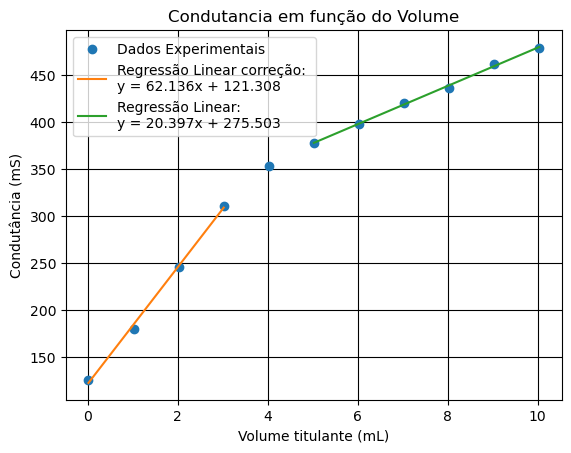

In [15]:
V=np.array([0,1,2,3,4,5,6,7,8,9,10])#Volume de CuSO4
#Coreção de volume bureta 6
a=1.0021
b=0.014
Vc=a*V+b
V0=100#mL
#condutancia medida
L=np.array([[121.1,130.0],
           [175.5,180.6],
            [238.3,243.4],
            [295,309.1],
            [326.1,354.1],
            [346.9,371.8],
            [362.8,388.8],
            [381.5,405.1],
            [393.9,414.6],
            [412.6,434.0],
            [423.2,448.3]])
#Correção da Condutância
m=np.array([0.3190,0.3884,0.3056]) #massa dos comprimidos
Lm=np.mean(L,axis=1)
Lc=Lm*((V0+Vc)/V0)

plt.plot (Vc,Lc,'o',label='Dados Experimentais')
plt.title("Condutancia em função do Volume")
plt.xlabel('Volume titulante (mL)')
plt.ylabel("Condutância (mS)")
plt.legend()
plt.grid (True, color='k')

r1=Lc[0:4]
v1=Vc[0:4]

r2=Lc[5:11]
v2=Vc[5:11]

# Regressão linear
coefficients1 = np.polyfit(v1,r1, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients1)   # Objeto polinomial
r1_fit = poly(v1)  # Valores ajustados
plt.plot(v1, r1_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients1[0]:.3f}x + {coefficients1[1]:.3f}')
plt.legend()
#y=b+ax
a1=coefficients1[0]
b1=coefficients1[1]

# Regressão linear
coefficients2 = np.polyfit(v2,r2, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients2)   # Objeto polinomial
r2_fit = poly(v2)  # Valores ajustados
plt.plot(v2, r2_fit, '-', label=f'Regressão Linear: \ny = {coefficients2[0]:.3f}x + {coefficients2[1]:.3f}')
plt.legend()
#a1x+b1=a2x+b2
a2=coefficients2[0]
b2=coefficients2[1]
def calcular_x (a1,a2,b1,b2):
    x=(b2-b1)/(a1-a2)
    return x

xv=calcular_x(a1,a2,b1,b2)

print ('O volume utilizado até o ponto de viragem é {:.4f}'.format (xv))
plt.savefig('grafico_captopril.png', format='png')

### Cálculo príncio ativo Captopril em comprimido

In [107]:
m_2comp_cap=np.array([0.3275,0.3107,0.3084,0.3190,0.3889,0.3056,0.3184,0.3084,0.3251])
m_1comp_cap=m_2comp_cap/2
M_med_comp_cap=np.mean(m_1comp_cap)
n=9
t=2.31
s_comp_cap=np.std(m_1comp_cap, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_comp_cap=(t*s_comp_cap)/math.sqrt(n)
print('({:.4} +/- {:.2}) g'.format(M_med_comp_cap,Ic_comp_cap))
p_m_comp_cap=(s_comp_cap/M_med_comp_cap)*100
print ('A precisão é {:.3}%'.format(p_m_comp_cap))
C_cuso4=0.0125 #mol/L
Vg_cuso4=np.array([4.191,3.929,3.827,3.460,2.735,3.870,3.370,3.528,4.067]) #mL
MM_cap=217.27 #g/mol

N_cuso4=(Vg_cuso4*C_cuso4)/1000
N_cap=N_cuso4/2
M_cap=N_cap*MM_cap*1000*2
print('Possui {} mg de Captopril por comprimido'. format(M_cap))

M_cap_med=np.mean(M_cap)#mg
s_M_cap=np.std(M_cap, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_M_cap=(t*s_M_cap)/math.sqrt(n)
p_M_cap = (s_M_cap / M_cap_med) * 100
print('({:.4} +/- {:.3}) mg e a precisão é {:.5}%'.format(M_cap_med,Ic_M_cap,p_M_cap))
principio_ativo_cap=(M_cap/m_2comp_cap)/10

principio_ativo_med_cap=np.mean(principio_ativo_cap)
s_principio_ativo_cap=np.std(principio_ativo_cap, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_principio_ativo_cap=(t*s_principio_ativo_cap)/math.sqrt(n)
p_principio_ativo_cap = (s_principio_ativo_cap / principio_ativo_med_cap) * 100
print('({:.2} +/- {:.2}) g e a precisão é {:.5}%'.format(principio_ativo_med_cap,Ic_principio_ativo_cap,p_principio_ativo_cap))

(0.1618 +/- 0.0099) g
A precisão é 7.94%
Possui [11.38223213 10.67067288 10.39365363  9.3969275   7.42791813 10.51043625
  9.15249875  9.581607   11.04546363] mg de Captopril por comprimido
(9.951 +/- 0.932) mg e a precisão é 12.163%
(3.1 +/- 0.39) g e a precisão é 16.178%


## DETERMINAÇÃO DA CONDUTIVIDADE ELÉTRICA D  AMOSTRAS DE ÁGUA

Na análise condutimétrica direta temos:

$$ L=\frac{A}{d}\sum c_i \cdot \lambda _i $$

Tal que:
$$k=L\frac{d}{A}=L\theta=\sum c_i \cdot \lambda _i$$

Foi medida a condutividade elétrica das seguintes amostras:

- Água destilada do laboratório;
- Água deionizada por troca iônica;
- Água deionizada por osmose reversa;
- Água da torneira;
- Água do bebedouro;
- Água mineral.

In [162]:
coduntimetria_Agua=pd.read_excel('condutimetria_Agua.xlsx')
coduntimetria_Agua.to_csv('coduntimetria_Agua.csv', index=False)

coduntimetria_Agua


,Condutividade elétrica (K/ \muS),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,K1,K2,K3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Milli Q,1.07,1.18,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deionizada,1,1.11,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Torneira,150.2,150.2,150.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bebedouro,134.6,145.3,142.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mineral,33.13,32.7,32.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,constante da célula,NaN,0.8719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sorimax,13.65,13.69,13.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Curva Analítica

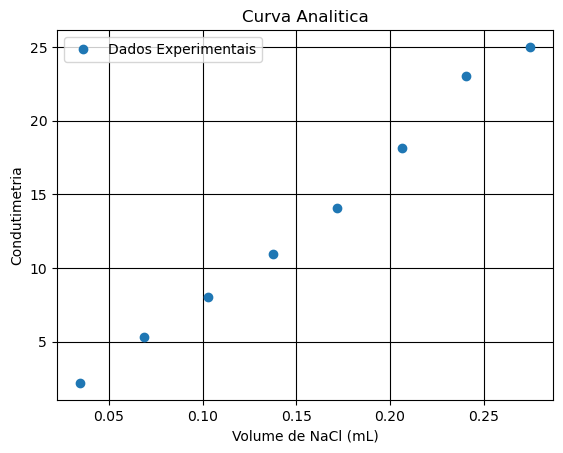

In [204]:
V_NaCl=coduntimetria_Agua.loc[19:26,'Unnamed: 1']
K_mS_corrigido=coduntimetria_Agua.loc[19:26,'Unnamed: 3']

plt.plot (V_NaCl,K_mS_corrigido,'o',label="Dados Experimentais")
plt.title ('Curva Analitica')
plt.ylabel ('Condutimetria')
plt.xlabel('Volume de NaCl (mL)')
plt.legend()
plt.grid (True, color='k')

Sorimax=coduntimetria_Agua.loc[9,'Unnamed: 1':'Unnamed: 3']
Arboreto=coduntimetria_Agua.loc[10,'Unnamed: 1':'Unnamed: 3']

C_NaOH=20.083 #%m/v
MM_NaCl=58.44


In [177]:
theta=coduntimetria_Agua.loc[6,'Unnamed: 2']
Milli_Q=coduntimetria_Agua.loc[1,'Unnamed: 1':'Unnamed: 3']
Deionizada=coduntimetria_Agua.loc[2,'Unnamed: 1':'Unnamed: 3']
Torneira=coduntimetria_Agua.loc[3,'Unnamed: 1':'Unnamed: 3']
Bebedouro=coduntimetria_Agua.loc[4,'Unnamed: 1':'Unnamed: 3']
Mineral=coduntimetria_Agua.loc[5,'Unnamed: 1':'Unnamed: 3']
